# REGULARIZATION

This Jupyter Notebook is a supplement for **Chapter 5. Regression Models** of the [Machine Learning For Everyone](ml4everyonebook.com) book.

# 1. Data & Basic Libraries

Let's import basic libraries and the data that we use in the book.

In [4]:
# Basic libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Defined data

X_train = [12, 28, 33, 48, 57, 63, 78, 82, 97]
y_train = [24, 24, 14, 30, 31, 34, 49, 44, 46]

X_test = [17, 47, 52, 92, 105]
y_test = [19, 38, 25, 59, 27]

Let's visualize the data on the graph.

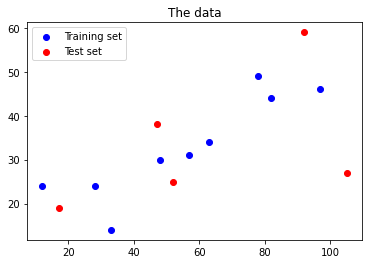

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.title('The data')
plt.legend(loc='best')

# 2. Building Three Polynomial Models

## 2.1. Third-degree polynomial

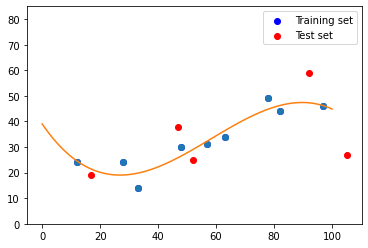

In [211]:
# build a model
degrees = 3
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 100, 100)

# visualize
plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,85))
plt.show()

Let's see the estimated coefficients of the model

In [216]:
list(p.coef)

[-0.00022872572765581819,
 0.03999028609663429,
 -1.6533219675143218,
 39.03667777567869]

Let's see their absolute sum:

In [214]:
sum(abs(p.coef))

40.730218755017304

We can use the built model p(t) if we want to predict the price of any apartment, given its area. Let's predict the price of a 12-meter-squared apartment. 

In [213]:
p(12)

24.560177306032912

Let's calculate SSR_training and SSR_test:

In [10]:
predict_train = p(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = p(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 100.48067564052462 
 
 SSR_test = 516.3483958667161


## 2.2. Sixth-degree polynomial

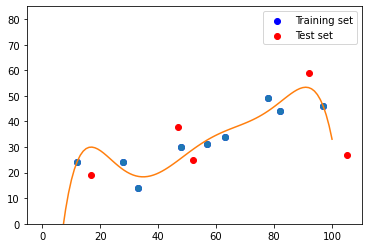

In [217]:
# build a model
degrees = 6
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 100, 100)

# visualize
plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,85))
plt.show()

Let's see the estimated coefficients of the model

In [218]:
list(p.coef)

[-1.6531658699208726e-08,
 5.503768310228185e-06,
 -0.0007234413696987076,
 0.04730737146796791,
 -1.5793842037945036,
 24.706532592600944,
 -112.99281014372553]

Let's see their absolute sum:

In [220]:
sum(abs(p.coef))

139.32676327325862

We can use the built model p(t) if we want to predict the price of any apartment, given its area. Let's predict the price of a 12-meter-squared apartment. 

In [235]:
p(12)

24.0

Let's calculate SSR_training and SSR_test:

In [334]:
predict_train = p(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = p(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 91.41547231051455 
 
 SSR_test = 1903.7316695636061


## 2.3. Ninth-degree polynomial

/Users/andrewwolf/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


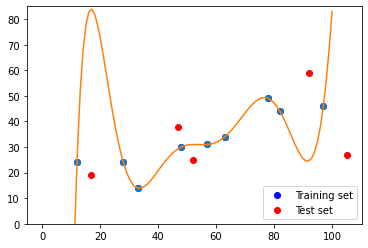

In [237]:
# build a model
degrees = 9
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 100, 100)

# visualize
plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,85))
plt.show()

Let's see the estimated coefficients of the model

In [228]:
list(p.coef)

[-3.58637402023228e-13,
 1.427942388697554e-10,
 -1.941161326344335e-08,
 4.895964811641605e-07,
 0.0001450104725076059,
 -0.017850165423022594,
 0.9430987801757589,
 -25.934557286222997,
 352.71977173119427,
 -1770.5038418637214]

Let's see their absolute sum:

In [234]:
sum(abs(p.coef))

2150.1192653463613

We can use the built model p(t) if we want to predict the price of any apartment, given its area. Let's predict the price of a 12-meter-squared apartment. 

In [238]:
p(12)

24.0

Let's calculate SSR_training and SSR_test:

In [342]:
predict_train = p(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = p(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 2.964368195182051e-19 
 
 SSR_test = 31621.56531087066


# Lasso

In [9]:
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

In [10]:
# Defined data

X_train = [12, 28, 33, 48, 57, 63, 78, 82, 97]
y_train = [24, 24, 14, 30, 31, 34, 49, 44, 46]

X_test = [17, 47, 52, 92, 105]
y_test = [19, 38, 25, 59, 27]

In [11]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [20]:
lasso_eps = 0.0001
lasso_nalpha=1
lasso_iter=5000



degree = 9
model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=2))
model.fit(X_train,y_train)
test_pred = np.array(model.predict(X_test))
RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
test_score = model.score(X_test,y_test)

/Users/andrewwolf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6215793280341835, tolerance: 0.012675
  model = cd_fast.enet_coordinate_descent(
/Users/andrewwolf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.467375373293827, tolerance: 0.01832
  model = cd_fast.enet_coordinate_descent(
/Users/andrewwolf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.537383596171722, tolerance: 0.10828888888888889
  model = cd_fast.enet_coordinate_descent(


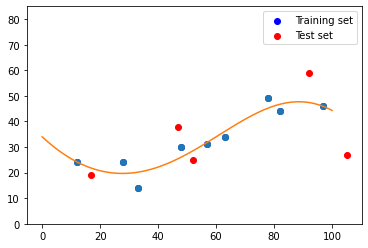

In [21]:
t = np.array(np.linspace(0, 100, 100)).reshape(-1, 1)


# visualize
plt.plot(X_train, y_train, 'o', t, model.predict(t), '-')
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,85))
plt.show()

# Ridge

In [36]:
from sklearn.linear_model import Ridge

ridge_eps = 0.0001
ridge_nalpha=1
ridge_iter=5000



degree = 9
model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), Ridge(alpha=ridge_nalpha, normalize=True))
model.fit(X_train,y_train)
test_pred = np.array(model.predict(X_test))
RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
test_score = model.score(X_test,y_test)

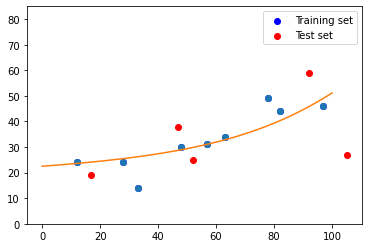

In [37]:
t = np.array(np.linspace(0, 100, 100)).reshape(-1, 1)


# visualize
plt.plot(X_train, y_train, 'o', t, model.predict(t), '-')
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,85))
plt.show()